<h1>02 Data Exploration<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#工具包导入&amp;数据读取" data-toc-modified-id="工具包导入&amp;数据读取-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Python Packages&amp;Reading Data</a></span><ul class="toc-item"><li><span><a href="#工具包导入" data-toc-modified-id="工具包导入-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Python Packages</a></span></li><li><span><a href="#读取数据" data-toc-modified-id="读取数据-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading Data</a></span></li></ul></li><li><span><a href="#数据初步分析" data-toc-modified-id="数据初步分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Analysis</a></span><ul class="toc-item"><li><span><a href="#数据边界" data-toc-modified-id="数据边界-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Boundary</a></span></li><li><span><a href="#训练集与测试集的相关性" data-toc-modified-id="训练集与测试集的相关性-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The Relationship Between Training Data and Testing Data</a></span></li><li><span><a href="#数据的分布" data-toc-modified-id="数据的分布-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Distribution</a></span></li></ul></li><li><span><a href="#数据处理及分析" data-toc-modified-id="数据处理及分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Processing and Analysis</a></span><ul class="toc-item"><li><span><a href="#将特征数值化" data-toc-modified-id="将特征数值化-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Digitize the Features</a></span></li><li><span><a href="#数据分析" data-toc-modified-id="数据分析-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#箱线图查看分布" data-toc-modified-id="箱线图查看分布-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use Boxplot to View the Distribution</a></span></li><li><span><a href="#直方图和QQ图" data-toc-modified-id="直方图和QQ图-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Histgram and QQ Plot</a></span></li><li><span><a href="#对比分布" data-toc-modified-id="对比分布-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparison Distribution</a></span></li><li><span><a href="#可视化线性关系" data-toc-modified-id="可视化线性关系-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Visualization of the Linear Relationship</a></span></li></ul></li></ul></div>

# Import Python Packages&Reading Data

##  Import Python  Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

## Reading Data

In [5]:
off_train = pd.read_csv('../data/ccf_offline_stage1_train.csv',keep_default_na=True)
off_train.columns=['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']
off_test = pd.read_csv('../data/ccf_offline_stage1_test_revised.csv',keep_default_na=True)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']
on_train = pd.read_csv('../data/ccf_online_stage1_train.csv',keep_default_na=True)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']
off_train[['user_id','merchant_id','coupon_id']]=off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']]=off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']]=on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [6]:
#Offline Training Data
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,nan,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


## Initial Data Exploration

In [7]:
#Online Training Data
on_train.head()

,user_id,merchant_id,action,coupon_id,discount_rate,date_received,date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,nan,NaN,NaN,20160321.0
2,14336199,18907,0,nan,NaN,NaN,20160618.0
3,14336199,18907,0,nan,NaN,NaN,20160618.0
4,14336199,18907,0,nan,NaN,NaN,20160618.0


In [8]:
#Testing Data
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


In [11]:
#Offline Training Data
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
user_id          object
merchant_id      object
coupon_id        object
discount_rate    object
distance         float64
date_received    float64
date             float64
dtypes: float64(3), object(4)
memory usage: 93.7+ MB


In [12]:
#Online Training Data
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
user_id          object
merchant_id      object
action           int64
coupon_id        object
discount_rate    object
date_received    float64
date             float64
dtypes: float64(2), int64(1), object(4)
memory usage: 610.4+ MB


In [13]:
#Testing Data
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
user_id          113640 non-null object
merchant_id      113640 non-null object
coupon_id        113640 non-null object
discount_rate    113640 non-null object
distance         101576 non-null float64
date_received    113640 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [14]:
#Offline Training Data
off_train.describe()

,distance,date_received,date
count,1.648881e+06,1.053282e+06,7.769840e+05
mean,2.361636e+00,2.016032e+07,2.016040e+07
std,3.483974e+00,1.771416e+02,1.621500e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016013e+07,2.016031e+07
50%,0.000000e+00,2.016032e+07,2.016042e+07
75%,3.000000e+00,2.016051e+07,2.016052e+07
max,1.000000e+01,2.016062e+07,2.016063e+07


In [15]:
#Online Training Data
on_train.describe()

,action,date_received,date
count,1.142983e+07,8.723570e+05,1.077393e+07
mean,2.348193e-01,2.016037e+07,2.016039e+07
std,5.426314e-01,1.560031e+02,1.732371e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016023e+07,2.016023e+07
50%,0.000000e+00,2.016040e+07,2.016041e+07
75%,0.000000e+00,2.016051e+07,2.016052e+07
max,2.000000e+00,2.016062e+07,2.016063e+07


In [16]:
##Testing Data
off_test.describe()

,distance,date_received
count,101576.000000,1.136400e+05
mean,2.328040,2.016072e+07
std,3.260755,9.019508e+00
min,0.000000,2.016070e+07
25%,0.000000,2.016071e+07
50%,1.000000,2.016072e+07
75%,3.000000,2.016072e+07
max,10.000000,2.016073e+07


In [17]:
#Offline Training Data
off_train.isnull().sum()

user_id               0
merchant_id           0
coupon_id             0
discount_rate    701602
distance         106003
date_received    701602
date             977900
dtype: int64

In [18]:
#Online Training Data
on_train.isnull().sum()

user_id                 0
merchant_id             0
action                  0
coupon_id               0
discount_rate    10557469
date_received    10557469
date               655898
dtype: int64

In [19]:
#Testing Data
off_test.isnull().sum()

user_id              0
merchant_id          0
coupon_id            0
discount_rate        0
distance         12064
date_received        0
dtype: int64

# Initial Data Exploration

## Data Boundary

Initial Exploration of the Date Range of the Data。

In [20]:
#Read the data again, keep the null as is, so processing will be convienient
off_train = pd.read_csv('../data/ccf_offline_stage1_train.csv',keep_default_na=False)
off_train.columns=['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']
off_test = pd.read_csv('../data/ccf_offline_stage1_test_revised.csv',keep_default_na=False)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']
on_train = pd.read_csv('../data/ccf_online_stage1_train.csv',keep_default_na=False)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']
off_train[['user_id','merchant_id','coupon_id']]=off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']]=off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']]=on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [21]:
print('offline train date_received')
print(off_train[off_train['date_received']!='null']['date_received'].min())
print(off_train[off_train['date_received']!='null']['date_received'].max())

print('online train date_received')
print(on_train[on_train['date_received']!='null']['date_received'].min())
print(on_train[on_train['date_received']!='null']['date_received'].max())

print('test date_received')
print(off_test['date_received'].min())
print(off_test['date_received'].max())

offline train date_received
20160101
20160615
online train date_received
20160101
20160615
test date_received
20160701
20160731


In [22]:
print('offline train date')
print(off_train[off_train['date']!='null']['date'].min())
print(off_train[off_train['date']!='null']['date'].max())

print('online train date')
print(on_train[on_train['date']!='null']['date'].min())
print(on_train[on_train['date']!='null']['date'].max())

offline train date
20160101
20160630
online train date
20160101
20160630


Through data exploration, we found that the date range of the training data is until June 30th, however, last date of issuing the coupons is not until June 30th, but June 15th. We need to pay attention to this when designing the sliding window structure.

## Relation between the Training Data and Testing Data

When participating a machine learning competition, or doing machine learning in a real application, the value of different data is different，also, not all data obtained is useful。Exploration of the overlap of testing data and training data will help to design the construction of data features later.

In [23]:
#Explore the 'online offline' training data, about the overlap situation of its 'user_id' feature and the same feature in the testing data
off_train_user=off_train[['user_id']].copy().drop_duplicates()
off_test_user=off_test[['user_id']].copy().drop_duplicates()
on_train_user=on_train[['user_id']].copy().drop_duplicates()
print ('offline training data, the number of user IDs')
print (off_train_user.user_id.count())
print ('online training data, the number of user IDs')
print (on_train_user.user_id.count())
print ('offline testing data, the number of user IDs')
print (off_test_user.user_id.count())
off_train_user['off_train_flag']=1
off_merge=off_test_user.merge(off_train_user,on='user_id', how="left").reset_index().fillna(0)
print ('offline data, number of overlapped user IDs in training data and testing data')
print(off_merge['off_train_flag'].sum())
print ('offline data, ratio of the overlapped user IDs in the testing data')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())
on_train_user['on_train_flag']=1
on_merge=off_test_user.merge(on_train_user,on='user_id', how="left").reset_index().fillna(0)
print ('online data, number of overlapped user IDs in training data and testing data')
print(on_merge['on_train_flag'].sum())
print ('online data, ratio of the overlapped user IDs in the testing data')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集用户ID数量
539438
online 训练集用户ID数量
762858
offline 测试集用户ID数量
76309
offline 训练集用户与测试集用户重复数量
76307.0
offline 训练集用户与测试集重复用户在总测试集用户中的占比
0.9999737907717308
online 训练集用户与测试集用户重复数量
43155.0
online 训练集用户与测试集重复用户在总测试集用户中的占比
0.5655296229802513


In [24]:
#查看online offline 训练集的 merchant_id 与测试集的重合度
off_train_merchant=off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant=off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant=on_train[['merchant_id']].copy().drop_duplicates()
print ('offline 训练集商家ID数量')
print (off_train_merchant.merchant_id.count())
print ('online 训练集商家ID数量')
print (on_train_merchant.merchant_id.count())
print ('offline 测试集商家ID数量')
print (off_test_merchant.merchant_id.count())

off_train_merchant['off_train_flag']=1
off_merge=off_test_merchant.merge(off_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('offline 训练集商家与测试集商家重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集商家与测试集重复商家在总测试集商家中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag']=1
on_merge=off_test_merchant.merge(on_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('online 训练集商家与测试集商家重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集商家与测试集重复商家在总测试集商家中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集商家ID数量
8415
online 训练集商家ID数量
7999
offline 测试集商家ID数量
1559
offline 训练集商家与测试集商家重复数量
1558.0
offline 训练集商家与测试集重复商家在总测试集商家中的占比
0.9993585631815266
online 训练集商家与测试集商家重复数量
0.0
online 训练集商家与测试集重复商家在总测试集商家中的占比
0.0


In [25]:
#查看online offline 训练集的 coupon_id 与测试集的重合度
off_train_coupon=off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon=off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon=on_train[['coupon_id']].copy().drop_duplicates()
print ('offline 训练集优惠券ID数量')
print (off_train_coupon.coupon_id.count())
print ('online 训练集优惠券ID数量')
print (on_train_coupon.coupon_id.count())
print ('offline 测试集优惠券ID数量')
print (off_test_coupon.coupon_id.count())

off_train_coupon['off_train_flag']=1
off_merge=off_test_coupon.merge(off_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('offline 训练集优惠券与测试集优惠券重复数量')
print(off_merge['off_train_flag'].sum())
print ('offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(off_merge['off_train_flag'].sum()/off_merge['off_train_flag'].count())

on_train_coupon['on_train_flag']=1
on_merge=off_test_coupon.merge(on_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('online 训练集优惠券与测试集优惠券重复数量')
print(on_merge['on_train_flag'].sum())
print ('online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline 训练集优惠券ID数量
9739
online 训练集优惠券ID数量
27748
offline 测试集优惠券ID数量
2050
offline 训练集优惠券与测试集优惠券重复数量
1118.0
offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.5453658536585366
online 训练集优惠券与测试集优惠券重复数量
0.0
online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.0


对用户，商家，优惠券在训练集和测试集的重合情况进行探索发现：
测试集的用户ID与Offline训练集重复占比0.999以上，与Online训练集重复占比0.565。
测试集的商家ID与Offline训练集重复占比0.999以上，与Online训练集没有重复。
测试集的优惠券ID与训练集都没有重复。
结论：Online数据价值比较低，后续特征提取将以Offline训练集为主。在提取优惠券统计特征的时候不能通过ID进行合并。
在后续可视化分析中将主要在Offline训练集及测试集之间进行。

## 数据的分布

In [27]:
off_train['discount_rate'].value_counts()

null       701602
30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: discount_rate, dtype: int64

In [28]:
off_test['discount_rate'].value_counts()

30:5       59318
20:1       11273
50:10       7476
20:5        7026
200:20      5496
30:1        4016
10:1        3758
100:10      3706
50:5        2693
100:20      2327
0.95         991
0.9          827
0.8          735
150:5        495
100:5        467
30:10        407
10:5         346
50:1         339
200:30       258
150:20       248
100:30       229
150:30       181
5:1          171
300:30       136
200:50       124
20:10        114
100:50        97
50:20         97
150:50        92
150:10        61
30:20         32
200:10        26
300:50        19
200:5         18
100:1         14
300:20        10
0.5           10
200:100        3
0.85           1
0.7            1
0.6            1
500:30         1
Name: discount_rate, dtype: int64

In [29]:
off_train['distance'].value_counts()

0       826070
1       227221
10      206484
2       118413
null    106003
3        76598
4        55085
5        41452
6        32483
7        25681
8        21436
9        17958
Name: distance, dtype: int64

In [30]:
off_test['distance'].value_counts()

0       43867
1       18474
null    12064
10      10353
2        9523
3        5934
4        4006
5        2977
6        2179
7        1685
8        1359
9        1219
Name: distance, dtype: int64

通过初步观察感觉训练集和测试集数据分布比较一致。

# 数据处理及分析

## 将特征数值化

In [31]:
#分隔符
separator=':'
#计算折扣率，将满减和折扣统一
#因为discount_rate为null的时候一般都是没有使用优惠券，这个时候折扣应该是1
def get_discount_rate(s):
    s = str(s)
    if s=='null':
        return -1
        #return 1
    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0-float(s[1])/float(s[0])

#获取是否满减（full reduction promotion）
def get_if_fd(s):
    s = str(s)
    s = s.split(separator)
    if len(s)==1:
        return 0
    else:
        return 1
        
#获取满减的条件
def get_full_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s)==1:
        return -1
    else:
        return int(s[0])
        
#获取满减的优惠     
def get_reduction_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])


#获取月份
def get_month(s):
    if s[0]=='null':
        return -1
    else:    
        return int(s[4:6])

#获取日期
def get_day(s):
    if s[0]=='null':
        return -1
    else:    
        return int(s[6:8])
    
#获取日期间隔输入内容为Date:Date_received
def get_day_gap(s):
    s = s.split(separator)
    if s[0]=='null':
        return -1
    if s[1]=='null':
        return -1
    else:    
        return (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8])) - date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days

#获取Label，输入内容为Date:Date_received
def get_label(s):
    s = s.split(separator)
    if s[0]=='null':
        return 0
    if s[1]=='null':
        return -1
    elif (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8]))-date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days<=15:
        return 1
    else:
        return -1

In [32]:
def add_feature(df):
    df['if_fd']=df['discount_rate'].apply(get_if_fd)
    df['full_value']=df['discount_rate'].apply(get_full_value)
    df['reduction_value']=df['discount_rate'].apply(get_reduction_value)
    df['discount_rate']=df['discount_rate'].apply(get_discount_rate)
    df['distance']=df['distance'].replace('null',-1).astype(int)
    #df['month_received'] = df['date_received'].apply(get_month)
    #df['month'] = df['date'].apply(get_month)
    return df
    
def add_label(df):
    df['day_gap']=df['date'].astype('str') + ':' +  df['date_received'].astype('str')
    df['label']=df['day_gap'].apply(get_label)
    df['day_gap']=df['day_gap'].apply(get_day_gap)
    return df

In [33]:
#拷贝数据，免得调试的时候重读文件
dftrain = off_train.copy()
dftest = off_test.copy()

In [34]:
dftrain=add_feature(dftrain)
dftrain=add_label(dftrain)
dftest=add_feature(dftest)

## 数据分析

In [35]:
dftrain.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date,if_fd,full_value,reduction_value,day_gap,label
0,1439408,2632,null,-1.000000,0,null,20160217,0,-1,-1,-1,-1
1,1439408,4663,11002,0.866667,1,20160528,null,1,150,20,-1,0
2,1439408,2632,8591,0.950000,0,20160217,null,1,20,1,-1,0
3,1439408,2632,1078,0.950000,0,20160319,null,1,20,1,-1,0
4,1439408,2632,8591,0.950000,0,20160613,null,1,20,1,-1,0


In [36]:
dftrain.describe()

,discount_rate,distance,if_fd,full_value,reduction_value,day_gap,label
count,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,1.069696e-01,2.158577e+00,5.812407e-01,4.665974e+01,5.807668e+00,-6.212582e-01,-3.693657e-01
std,9.061683e-01,3.470772e+00,4.933559e-01,6.830349e+01,9.037305e+00,2.414021e+00,5.534657e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,7.500000e-01,0.000000e+00,1.000000e+00,2.000000e+01,5.000000e+00,-1.000000e+00,0.000000e+00
75%,9.000000e-01,3.000000e+00,1.000000e+00,1.000000e+02,1.000000e+01,-1.000000e+00,0.000000e+00
max,9.900000e-01,1.000000e+01,1.000000e+00,3.000000e+02,1.000000e+02,9.600000e+01,1.000000e+00


In [37]:
dftest.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,if_fd,full_value,reduction_value
0,4129537,450,9983,0.833333,1,20160712,1,30,5
1,6949378,1300,3429,0.833333,-1,20160706,1,30,5
2,2166529,7113,6928,0.900000,5,20160727,1,200,20
3,2166529,7113,1808,0.900000,5,20160727,1,100,10
4,6172162,7605,6500,0.966667,2,20160708,1,30,1


In [38]:
dftest.describe()

,discount_rate,distance,date_received,if_fd,full_value,reduction_value
count,113640.000000,113640.000000,1.136400e+05,113640.000000,113640.000000,113640.000000
mean,0.850671,1.974736,2.016072e+07,0.977420,43.396507,6.089141
std,0.063551,3.248809,9.019508e+00,0.148561,44.239815,5.640310
min,0.333333,-1.000000,2.016070e+07,0.000000,-1.000000,-1.000000
25%,0.833333,0.000000,2.016071e+07,1.000000,30.000000,5.000000
50%,0.833333,1.000000,2.016072e+07,1.000000,30.000000,5.000000
75%,0.900000,3.000000,2.016072e+07,1.000000,30.000000,5.000000
max,0.990000,10.000000,2.016073e+07,1.000000,500.000000,100.000000


In [39]:
dftrain[dftrain.distance>=0]['distance'].value_counts()/dftrain[dftrain.distance>=0]['distance'].count()

0     0.500988
1     0.137803
10    0.125227
2     0.071814
3     0.046455
4     0.033408
5     0.025139
6     0.019700
7     0.015575
8     0.013000
9     0.010891
Name: distance, dtype: float64

In [40]:
dftest[dftest.distance>=0]['distance'].value_counts()/dftest[dftest.distance>=0]['distance'].count()

0     0.431864
1     0.181874
10    0.101924
2     0.093752
3     0.058419
4     0.039438
5     0.029308
6     0.021452
7     0.016589
8     0.013379
9     0.012001
Name: distance, dtype: float64

In [41]:
dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'].value_counts()/dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'].count()

0     0.364509
10    0.183892
1     0.152033
2     0.086069
3     0.058229
4     0.042997
5     0.032928
6     0.026195
7     0.020890
8     0.017433
9     0.014824
Name: distance, dtype: float64

In [42]:
dftest[(dftest.distance>=0)]['distance'].value_counts()/dftest[(dftest.distance>=0)]['distance'].count()

0     0.431864
1     0.181874
10    0.101924
2     0.093752
3     0.058419
4     0.039438
5     0.029308
6     0.021452
7     0.016589
8     0.013379
9     0.012001
Name: distance, dtype: float64

In [43]:
print ('Offline 训练集满减情况')
dftrain.if_fd.value_counts()/dftrain.if_fd.count()

Offline 训练集满减情况


1    0.581241
0    0.418759
Name: if_fd, dtype: float64

In [44]:
print ('测试集满减情况')
dftest.if_fd.value_counts()/dftest.if_fd.count()

测试集满减情况


1    0.97742
0    0.02258
Name: if_fd, dtype: float64

## 箱线图查看分布

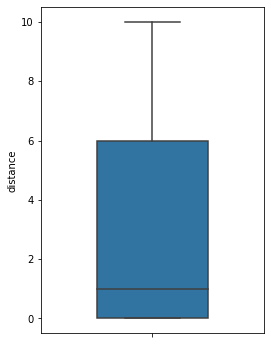

In [46]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'],orient="v", width=0.5)

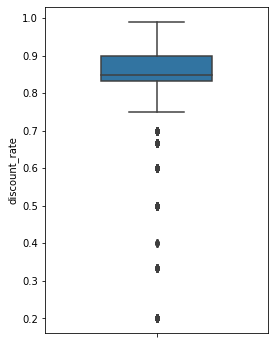

In [47]:
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象宽度和高度
sns.boxplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'],orient="v", width=0.5)

## 直方图和QQ图

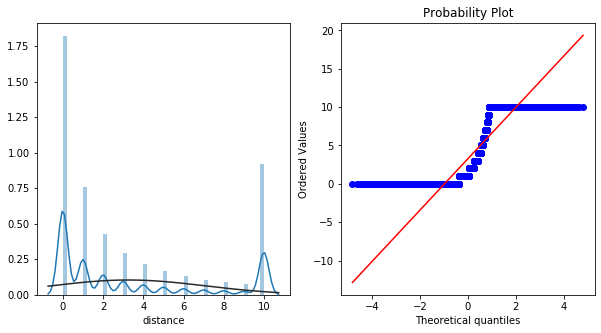

In [48]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], plot=plt)

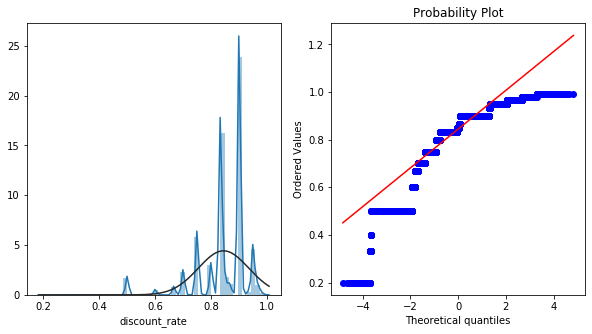

In [49]:
plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'], plot=plt)

## 对比分布

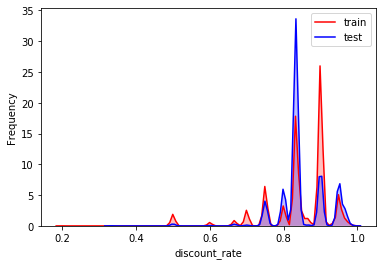

In [50]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.discount_rate>=0)]['discount_rate'], color="Blue", shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

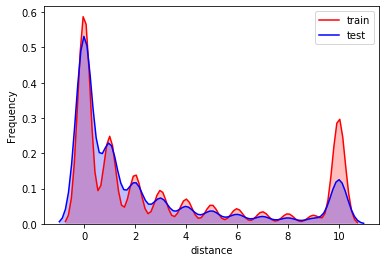

In [51]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.distance>=0)]['distance'], color="Blue", shade=True)
ax.set_xlabel('distance')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

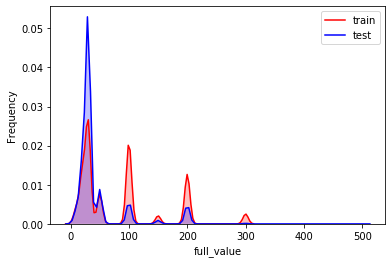

In [52]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.full_value>=0)]['full_value'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.full_value>=0)]['full_value'], color="Blue", shade=True)
ax.set_xlabel('full_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

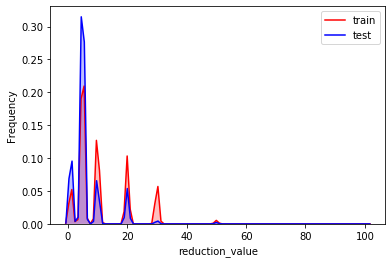

In [53]:
ax = sns.kdeplot(dftrain[(dftrain.label>=0)&(dftrain.reduction_value>=0)]['reduction_value'], color="Red", shade=True)
ax = sns.kdeplot(dftest[(dftest.reduction_value>=0)]['reduction_value'], color="Blue", shade=True)
ax.set_xlabel('reduction_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train","test"])

## 可视化线性关系

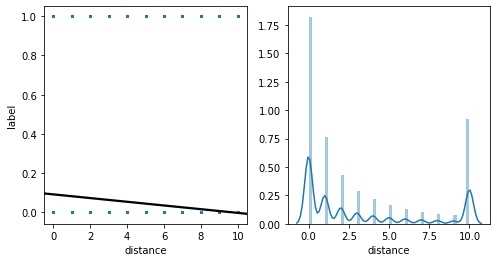

In [54]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.regplot(x='distance', y='label', data=dftrain[(dftrain.label>=0)&(dftrain.distance>=0)][['distance','label']], ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('distance')
plt.ylabel('label')
ax=plt.subplot(1,2,2)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.distance>=0)]['distance'].dropna())
plt.xlabel('distance')
plt.show()

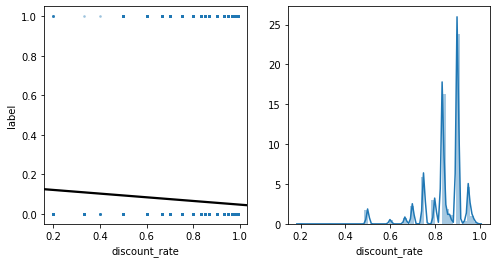

In [55]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.regplot(x='discount_rate', y='label', data=dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)][['discount_rate','label']], ax=ax, 
            scatter_kws={'marker':'.','s':3,'alpha':0.3},
            line_kws={'color':'k'});
plt.xlabel('discount_rate')
plt.ylabel('label')
ax=plt.subplot(1,2,2)
sns.distplot(dftrain[(dftrain.label>=0)&(dftrain.discount_rate>=0)]['discount_rate'].dropna())
plt.xlabel('discount_rate')
plt.show()